**[Posibility 1](https://drive.google.com/drive/folders/12l6IsJHFHyd09MpvPswm4I5Qxg9USL7C)**

**[Posibility 2](https://drive.google.com/drive/folders/1RhyGFVYYB6LtaLYhjEjO6lIq9t1a_d_i)**

# Bayes's rule: 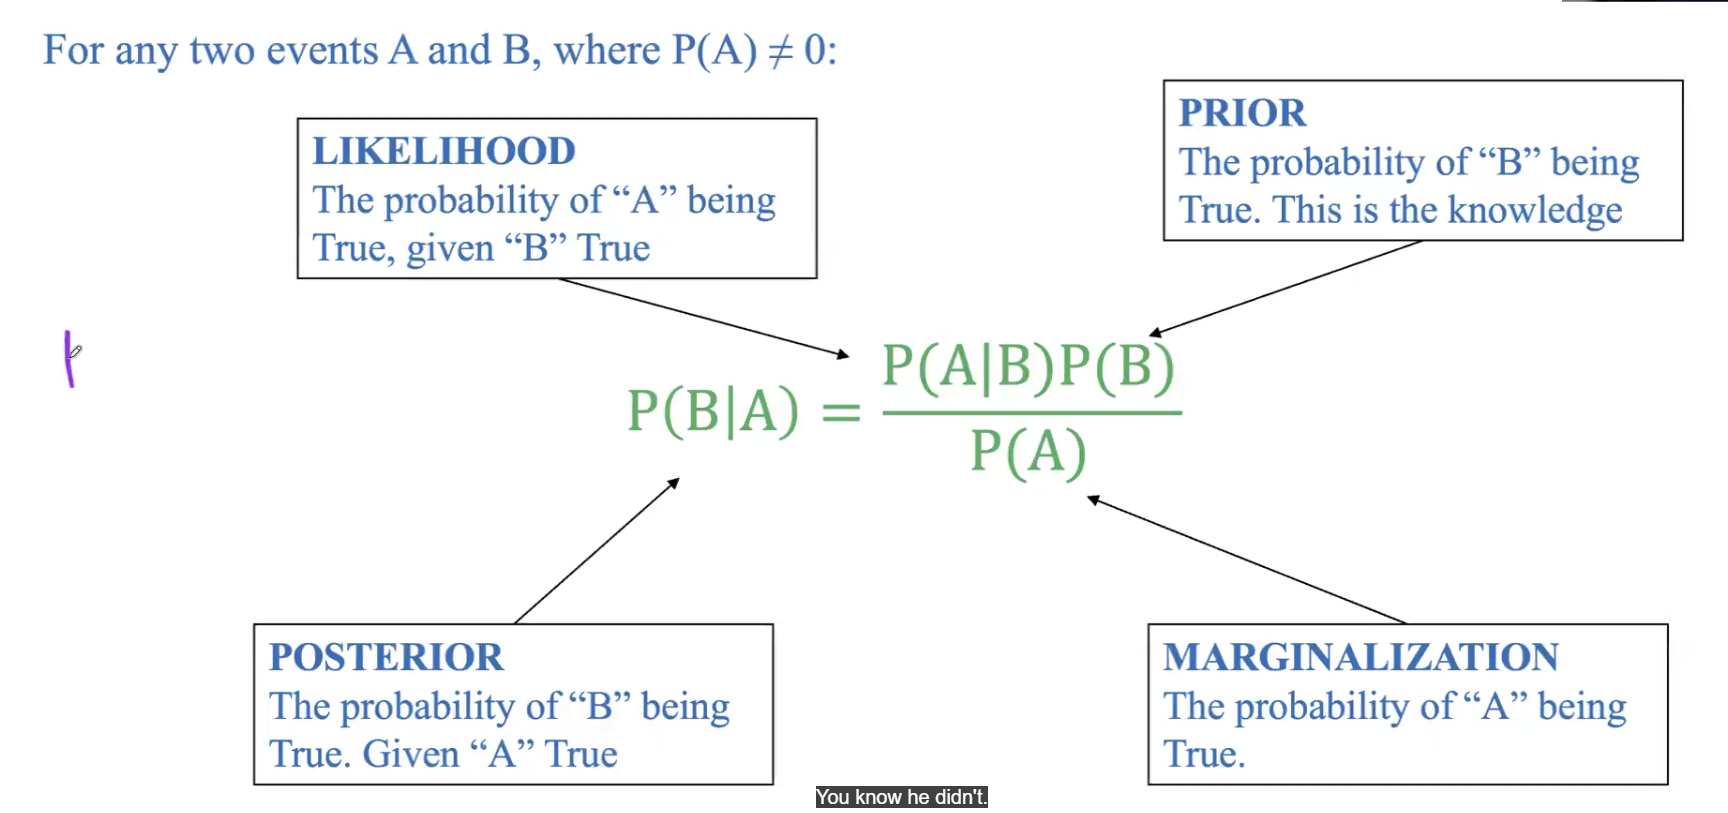

In [2]:
import numpy as np

def create_train_data():

  data=[['Sunny','Hot', 'High', 'Weak', 'no'],
        ['Sunny','Hot', 'High', 'Strong', 'no'],
        ['Overcast','Hot', 'High', 'Weak', 'yes'],
        ['Rain','Mild', 'High', 'Weak', 'yes'],
        ['Rain','Cool', 'Normal', 'Weak', 'yes'],
        ['Rain','Cool', 'Normal', 'Strong', 'no'],
        ['Overcast','Cool', 'Normal', 'Strong', 'yes'],
        ['Overcast','Mild', 'High', 'Weak', 'no'],
        ['Sunny','Cool', 'Normal', 'Weak', 'yes'],
        ['Rain','Mild', 'Normal', 'Weak', 'yes']
        ]
  return np.array(data)

train_data = create_train_data()
print(train_data)

[['Sunny' 'Hot' 'High' 'Weak' 'no']
 ['Sunny' 'Hot' 'High' 'Strong' 'no']
 ['Overcast' 'Hot' 'High' 'Weak' 'yes']
 ['Rain' 'Mild' 'High' 'Weak' 'yes']
 ['Rain' 'Cool' 'Normal' 'Weak' 'yes']
 ['Rain' 'Cool' 'Normal' 'Strong' 'no']
 ['Overcast' 'Cool' 'Normal' 'Strong' 'yes']
 ['Overcast' 'Mild' 'High' 'Weak' 'no']
 ['Sunny' 'Cool' 'Normal' 'Weak' 'yes']
 ['Rain' 'Mild' 'Normal' 'Weak' 'yes']]


In [4]:
def compute_prior_probablity(train_data):
  y_unique = ['no', 'yes']
  prior_probability = np.zeros(len(y_unique))
  for i in range(0,len(y_unique)):
    prior_probability[i]=len(np.where(train_data[:,4] == y_unique[i])[0])/len(train_data)
  return prior_probability

prior_probablity = compute_prior_probablity(train_data)
print("P(“Play Tennis” = No)", prior_probablity[0])
print("P(“Play Tennis” = Yes)", prior_probablity[1])

P(“Play Tennis” = No) 0.4
P(“Play Tennis” = Yes) 0.6


In [20]:
def compute_conditional_probability(train_data):
  y_unique = ['no', 'yes']
  conditional_probability = []
  list_x_name = []
  for i in range(0,train_data.shape[1]-1):
    x_unique = np.unique(train_data[:,i])
    print("x_unique", x_unique)

    list_x_name.append(x_unique)

    x_conditional_probability = np.zeros((len(y_unique),len(x_unique)))

    for j in range(0,len(y_unique)):
      for k in range(0,len(x_unique)):
        x_conditional_probability[j,k]= len(np.where((train_data[:,i] == x_unique[k]) & (train_data[:,4] == y_unique[j]))[0])/len(np.where(train_data[:,4] == y_unique[j])[0])

    conditional_probability.append(x_conditional_probability)
  return conditional_probability, list_x_name

conditional_probability, list_x_name = compute_conditional_probability(train_data)
print(conditional_probability[0])
print(list_x_name[0])

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']
[[0.25       0.25       0.5       ]
 [0.33333333 0.5        0.16666667]]
['Overcast' 'Rain' 'Sunny']


In [7]:
def train_naive_bayes(train_data):
    prior_probability = compute_prior_probablity(train_data)

    conditional_probability, list_x_name  = compute_conditional_probability(train_data)

    return prior_probability,conditional_probability, list_x_name

data = create_train_data()
prior_probability,conditional_probability, list_x_name = train_naive_bayes(data)

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']


In [6]:
def get_index_from_value(feature_name, list_features):
  return np.where(list_features == feature_name)[0][0]

In [17]:
def prediction_play_tennis(X, list_x_name, prior_probability, conditional_probability):

    x1=get_index_from_value(X[0],list_x_name[0])
    x2=get_index_from_value(X[1],list_x_name[1])
    x3=get_index_from_value(X[2],list_x_name[2])
    x4=get_index_from_value(X[3],list_x_name[3])

    print(x1)
    print(x2)
    print(x3)
    print(x4)

    p0=prior_probability[0] \
    *conditional_probability[0][0,x1] \
    *conditional_probability[1][0,x2] \
    *conditional_probability[2][0,x3] \
    *conditional_probability[3][0,x4]

    p1=prior_probability[1]\
    *conditional_probability[0][1,x1]\
    *conditional_probability[1][1,x2]\
    *conditional_probability[2][1,x3]\
    *conditional_probability[3][1,x4]


    if p0>p1:
        y_pred=0
    else:
        y_pred=1

    return y_pred

prediction_play_tennis(['Sunny','Cool','High','Weak'], list_x_name, prior_probability, conditional_probability)

2
0
0
1


0

In [ ]:
def train_naive_bayes(train_data):
    prior_probability = compute_prior_probablity(train_data)

    conditional_probability, list_x_name  = compute_conditional_probability(train_data)

    return prior_probability,conditional_probability, list_x_name

data = create_train_data()
prior_probability,conditional_probability, list_x_name = train_naive_bayes(data)

In [21]:
train_data = create_train_data()
conditional_probability, list_x_name  = compute_conditional_probability(train_data)
# Compute P("Outlook"="Sunny"|Play Tennis"="Yes")
x1=get_index_from_value("Sunny",list_x_name[0])
print("P('Outlook'='Sunny'|Play Tennis'='Yes') = ", np.round(conditional_probability[0][1, x1],2))

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']
P('Outlook'='Sunny'|Play Tennis'='Yes') =  0.17
